oleh Ma'mur Zaky Nurrokhman

## Import Library

In [1]:
import pandas as pd
import string
import re
import joblib
import matplotlib.pyplot as plt
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\zakymzn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\zakymzn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\zakymzn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\zakymzn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\zakymzn\AppData\Roaming\nltk

## Load Processed Data

In [2]:
df = pd.read_csv('../../data/processed/processed_reviews.csv')
df

,review,sentiment
0,aplikasi susah fungsi software mudah rumah kan...,Negatif
1,kecewa aplikasi buruk selesai daftar bukatiap ...,Negatif
2,buka pakai wifi kalo pakai paket data pribadi ...,Negatif
3,aplikasi bantu buka dukcapil wajib menginstal ...,Negatif
4,login berkalikali muncul jaring stabil jaring ...,Negatif
...,...,...
19665,aplikasi urus mas kudu fotocopy blok,Negatif
19666,mas ribet kantor dukcapil versifikasi,Negatif
19667,aplikasi buka internet lancar jaya koneksi put...,Negatif
19668,aplikasi bantu,Negatif


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19670 entries, 0 to 19669
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     19342 non-null  object
 1   sentiment  19670 non-null  object
dtypes: object(2)
memory usage: 307.5+ KB


In [4]:
df.isnull().sum()

review       328
sentiment      0
dtype: int64

In [5]:
df['review'].fillna('', inplace=True)
df.isnull().sum()

C:\Users\zakymzn\AppData\Local\Temp\ipykernel_6744\3722013860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review'].fillna('', inplace=True)


review       0
sentiment    0
dtype: int64

## Feature dan Label

In [6]:
# membagi atribut menjadi features (X) dan label (y)

X = df['review']
y = df['sentiment']

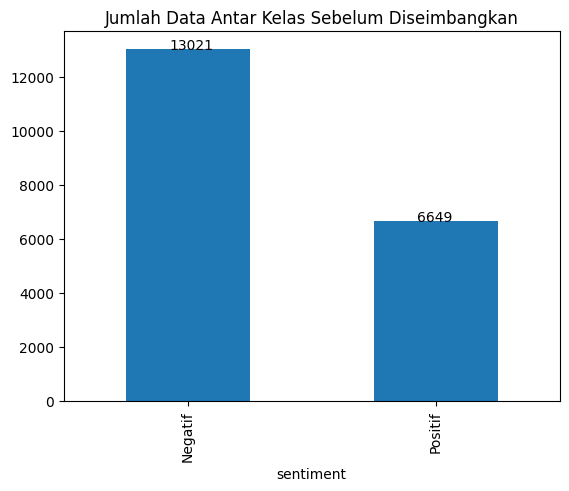

In [7]:
# menampilkan grafik jumlah data pada kolom sentiment

y.value_counts().plot(kind='bar')
plt.title('Jumlah Data Antar Kelas Sebelum Diseimbangkan')
plt.text(x=-0.075,y=y.value_counts()["Negatif"],s=y.value_counts()["Negatif"])
plt.text(x=0.925,y=y.value_counts()["Positif"],s=y.value_counts()["Positif"])
plt.show()

## Pembobotan Kata Menggunakan TF-IDF

In [9]:
# melakukan pembobotan kata dengan TF-IDF

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
X_tfidf

<19670x12974 sparse matrix of type '<class 'numpy.float64'>'
	with 118585 stored elements in Compressed Sparse Row format>

In [10]:
# menampilkan hasil tf-idf pada baris data pertama

first_vector = X_tfidf[0]
df_tfidf_first = pd.DataFrame(first_vector.T.todense(), index=tfidf.get_feature_names_out(), columns=['tfidf'])
df_tfidf_first.sort_values(by=['tfidf'], ascending=False).head(10)

,tfidf
software,0.402170
kesini,0.353591
normal,0.329554
bolak,0.297500
rumah,0.262573
error,0.238143
fungsi,0.237073
mulu,0.235008
jaring,0.200343
kantor,0.193990


## Menyeimbangkan Data Menggunakan SMOTE

In [11]:
# menyeimbangkan data berdasarkan atribut sentiment atau label (y)

oversampler = SMOTE()
X_tfidf_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

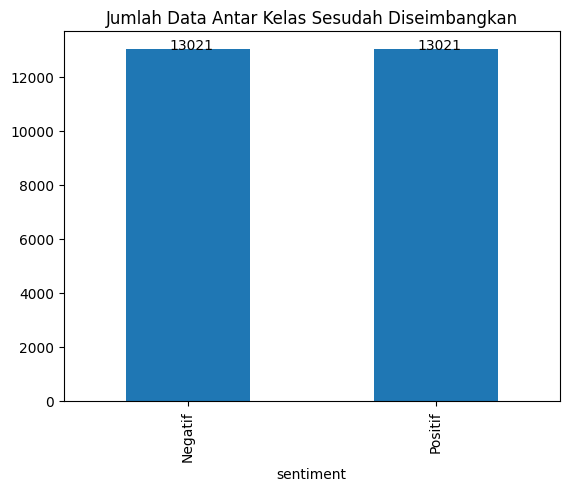

In [12]:
# menampilkan kembali grafik jumlah data pada kolom sentiment

y_resampled.value_counts().plot(kind='bar')
plt.title('Jumlah Data Antar Kelas Sesudah Diseimbangkan')
plt.text(x=-0.075,y=y_resampled.value_counts()["Negatif"],s=y_resampled.value_counts()["Negatif"])
plt.text(x=0.925,y=y_resampled.value_counts()["Positif"],s=y_resampled.value_counts()["Positif"])
plt.show()

## Pembagian Data Latih dan Data Uji

In [13]:
# membagi data menjadi data latih (training data) dan data uji (test data)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_resampled, y_resampled, test_size=0.2, random_state=42)

## Load Model Menggunakan Joblib

In [14]:
# inisiasi model machine learning

model = joblib.load('../../models/analisis_sentimen_ikd.joblib')

## Evaluasi

In [15]:
# memeriksa overfit/underfit

training_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print('Training accuracy :', training_accuracy)
print('Test accuracy :', test_accuracy)
print('Difference :', training_accuracy - test_accuracy)

Training accuracy : 0.9522392358277733
Test accuracy : 0.90266845843732
Difference : 0.049570777390453236


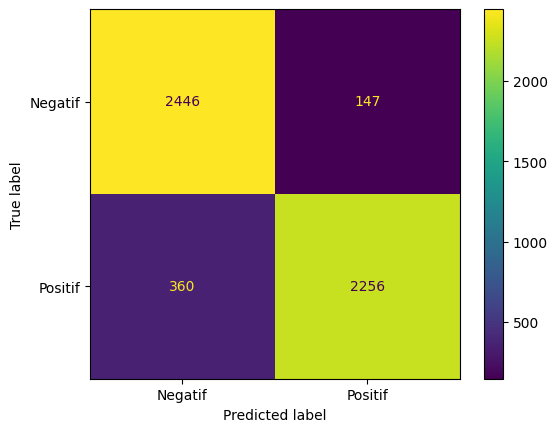

In [16]:
# menampilkan confusion matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [17]:
# melihat hasil laporan klasifikasi

print(classification_report(y_test, y_pred, zero_division=0, digits=4))

              precision    recall  f1-score   support

     Negatif     0.8717    0.9433    0.9061      2593
     Positif     0.9388    0.8624    0.8990      2616

    accuracy                         0.9027      5209
   macro avg     0.9053    0.9028    0.9025      5209
weighted avg     0.9054    0.9027    0.9025      5209

